# Arewa Data Science Academy
## Deep Learning Cohort 2.0

Name: Abubakar Abubakar Al-amin

Email: abubakaralamin100@gmail.com

Title: Week 2 Solution


Exercises Solution

<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [1]:
# Import necessary libraries
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [3]:
# Create the data parameters
weight = 0.3
bias = 0.9
start = 0
end = 1
step = 0.01

# Make X and y using linear regression feature
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [4]:
# Split the data into training and testing
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

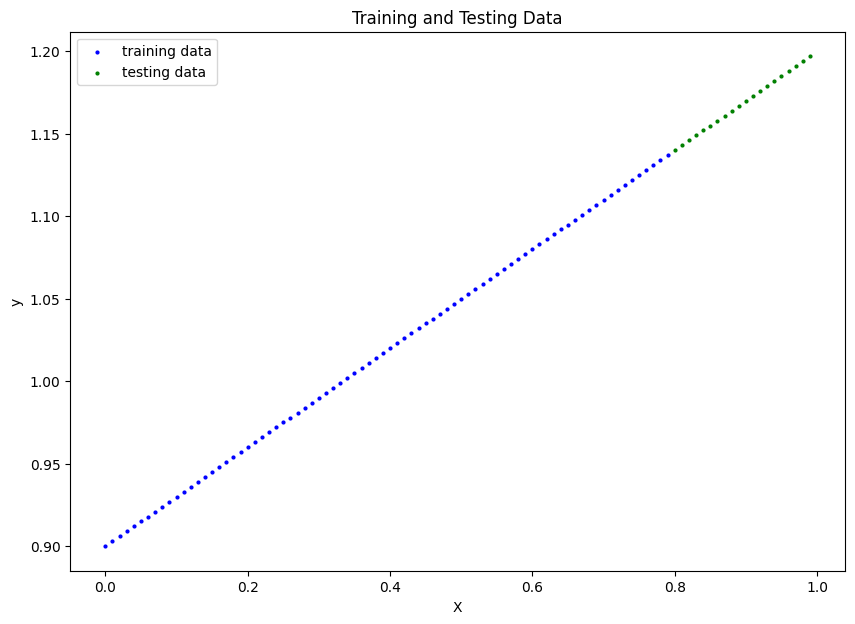

In [6]:
# Plot the training and testing data
plt.figure(figsize=(10, 7))  # Adjust figure size if needed
plt.scatter(X_train, y_train, c="b", s=4, label="training data")
plt.scatter(X_test, y_test, c="g", s=4, label="testing data")
plt.xlabel("X")  # Add x-axis label
plt.ylabel("y")  # Add y-axis label
plt.title("Training and Testing Data")  # Add title
plt.legend()  # Show legend

## 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [7]:
# Create PyTorch linear regression model by subclassing nn.Module

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Initialize the weight and bias parameters
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))

    def forward(self, x):
        # Linear regression formula: y = weight * x + bias
        return self.weight * x + self.bias

In [8]:

# Instantiate the model and put it to the target device
model = LinearRegressionModel()

model.to(device)

LinearRegressionModel()

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [9]:
# Create the loss function and optimizer

loss_fn = nn.L1Loss()


optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)


In [10]:
# Training loop
epochs = 300

# Send data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for epoch in range(epochs):
    ### Training

    # Put model in train mode
    model.train()

    # 1. Forward pass
    y_pred = model(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero gradients
    optimizer.zero_grad()

    # 4. Backpropagation
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Perform testing every 20 epochs
    if epoch % 20 == 0:

        # Put model in evaluation mode and setup inference context
        model.eval()
        with torch.inference_mode():
            # 1. Forward pass
            test_pred = model(X_test)

            # 2. Calculate test loss
            test_loss = loss_fn(test_pred, y_test)

            # Print out what's happening
            print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.164 | Test loss: 0.062
Epoch: 20 | Train loss: 0.044 | Test loss: 0.091
Epoch: 40 | Train loss: 0.037 | Test loss: 0.084
Epoch: 60 | Train loss: 0.030 | Test loss: 0.069
Epoch: 80 | Train loss: 0.023 | Test loss: 0.053
Epoch: 100 | Train loss: 0.016 | Test loss: 0.037
Epoch: 120 | Train loss: 0.009 | Test loss: 0.021
Epoch: 140 | Train loss: 0.002 | Test loss: 0.005
Epoch: 160 | Train loss: 0.006 | Test loss: 0.004
Epoch: 180 | Train loss: 0.006 | Test loss: 0.004
Epoch: 200 | Train loss: 0.006 | Test loss: 0.004
Epoch: 220 | Train loss: 0.006 | Test loss: 0.004
Epoch: 240 | Train loss: 0.006 | Test loss: 0.004
Epoch: 260 | Train loss: 0.006 | Test loss: 0.004
Epoch: 280 | Train loss: 0.006 | Test loss: 0.004


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [11]:
# Make predictions with the model
model.eval()  # Put the model in evaluation mode
with torch.inference_mode():
    predictions = model(X_test)

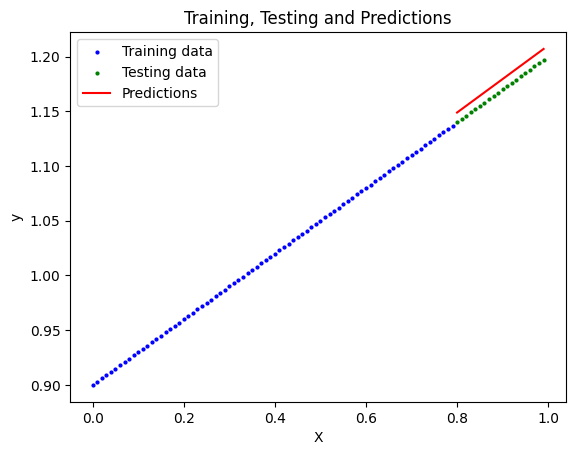

In [12]:
# Plot the predictions (these may need to be on a specific device)

#  Detach predictions and move to CPU if necessary
predictions = predictions.cpu().detach().numpy()

# Plot the training data
plt.scatter(X_train.cpu(), y_train.cpu(), c='b', s=4, label='Training data')

# Plot the testing data
plt.scatter(X_test.cpu(), y_test.cpu(), c='g', s=4, label='Testing data')

# Plot the predictions
plt.plot(X_test.cpu(), predictions, c='r', label='Predictions')

# Customize the plot
plt.xlabel('X')
plt.ylabel('y')
plt.title('Training, Testing and Predictions')
plt.legend(loc='upper left')

# 6. Show the plot
plt.show()

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [13]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_exercises_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_exercises_model.pth


In [14]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model = LinearRegressionModel()

# Load the saved state dictionary
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Move the loaded model to the target device
loaded_model.to(device)

<ipython-input-14-52098a276489>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))


LinearRegressionModel()

In [17]:
# Make predictions with loaded model and compare them to the previous
loaded_model.eval()
with torch.inference_mode():
    loaded_predictions = loaded_model(X_test)



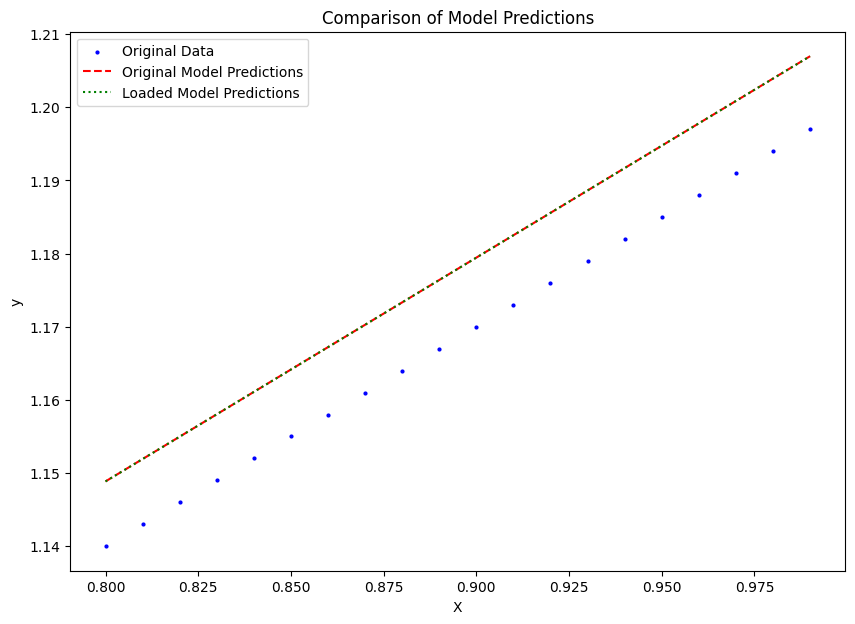

In [20]:
# Make predictions with loaded model
loaded_model.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)

# Move all tensors to CPU for plotting with matplotlib
predictions_cpu = torch.tensor(predictions).cpu()  # Convert predictions to tensor if it's not already
loaded_model_preds_cpu = loaded_model_preds.cpu()
X_test_cpu = X_test.cpu()


# Plot the predictions
plt.figure(figsize=(10, 7))
plt.scatter(X_test_cpu, y_test.cpu(), c='b', s=4, label='Original Data')  # Original Data
plt.plot(X_test_cpu, predictions_cpu, c='r', label='Original Model Predictions', linestyle='--')  # Original Model Predictions
plt.plot(X_test_cpu, loaded_model_preds_cpu, c='g', label='Loaded Model Predictions', linestyle=':')  # Loaded Model Predictions


# Customize the plot
plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparison of Model Predictions')
plt.legend(loc='upper left')

# Show the plot
plt.show()